In [1]:
import pandas as pd
import spacy
import matplotlib.pyplot as plt
import math
from wordcloud import WordCloud
from collections import Counter

df = pd.read_csv('Data/Update/Scopus.csv')
# df_abstract = pd.DataFrame(df['Abstract'])
nlp = spacy.load('en_core_web_sm')

In [2]:
dff = pd.DataFrame(pd.concat([df['Title'], df['Abstract']], ignore_index=True), columns=['Abstract'])

dff.to_csv('666.csv', index=False)

# Keyword Word Frequency

In [3]:
# not token.is_stop and token.pos_ != 'VERB'
def extract_keywords(sentence):
    doc = nlp(sentence)
    keywords = [str(token.text.lower()) for token in doc if not token.is_stop and token.is_alpha and token.lemma_ and len(token)>2]
    return keywords

keywords_array = []

# Similiar with Unigram
for _, row in df.iterrows():
    sentence = row['Abstract']
    keywords = extract_keywords(sentence)
    keywords_array.extend(keywords)

keywords_list = pd.DataFrame(list(set(keywords_array)))

display(keywords_list)

,0
0,densification
1,chains
2,described
3,warmer
4,rotations
...,...
6386,internalize
6387,seeking
6388,jawa
6389,communities


In [4]:
abstract_count = Counter(keywords_array)

result_dict = {key: abstract_count[key] for key in keywords_array if key in abstract_count}
sorted_result = dict(sorted(result_dict.items(), key=lambda item: (item[1], item[0])))

print(sorted_result)

{'aaiw': 1, 'aalborg': 1, 'aard': 1, 'abandonment': 1, 'abrupt': 1, 'absorbs': 1, 'acceptability': 1, 'acceptable': 1, 'accepted': 1, 'accepting': 1, 'accessibility': 1, 'accompanied': 1, 'accompany': 1, 'accompanying': 1, 'accord': 1, 'accordingly': 1, 'accountability': 1, 'accredited': 1, 'accumulate': 1, 'accumulated': 1, 'achievement': 1, 'achievements': 1, 'acidic': 1, 'acidify': 1, 'acidity': 1, 'acoustic': 1, 'acquiring': 1, 'acted': 1, 'activated': 1, 'actually': 1, 'adaptability': 1, 'adaptations': 1, 'adapted': 1, 'adapting': 1, 'add': 1, 'additive': 1, 'additives': 1, 'adds': 1, 'adequacy': 1, 'adhering': 1, 'adjust': 1, 'adjusting': 1, 'adjustments': 1, 'administer': 1, 'administrator': 1, 'adoptions': 1, 'adopts': 1, 'adults': 1, 'advancement': 1, 'advantageous': 1, 'adversely': 1, 'advisory': 1, 'advocated': 1, 'aeolian': 1, 'aerobic': 1, 'aess': 1, 'aez': 1, 'affair': 1, 'affairs': 1, 'affirming': 1, 'afford': 1, 'affordability': 1, 'affordable': 1, 'affords': 1, 'aforem

In [5]:
df = pd.DataFrame(list(sorted_result.items()), columns=['Word', 'Counts'])
# Save DataFrame to a CSV file
csv_file_path = 'data_luhn.csv'
df.to_csv(csv_file_path, index=False)

In [6]:
result_dict

{'pandemic': 8,
 'altered': 5,
 'course': 4,
 'economy': 37,
 'world': 56,
 'including': 70,
 'indonesia': 522,
 'government': 79,
 'policy': 74,
 'resort': 1,
 'social': 22,
 'restriction': 1,
 'working': 1,
 'home': 3,
 'increased': 53,
 'household': 14,
 'consumption': 106,
 'energy': 429,
 'reduce': 130,
 'commercial': 14,
 'use': 204,
 'economic': 101,
 'growth': 60,
 'greatly': 8,
 'affected': 21,
 'surged': 1,
 'second': 29,
 'wave': 1,
 'strikes': 1,
 'long': 52,
 'term': 46,
 'electricity': 94,
 'expected': 27,
 'recover': 1,
 'recent': 15,
 'plan': 17,
 'phase': 11,
 'coal': 78,
 'generation': 66,
 'sector': 95,
 'provided': 15,
 'pathway': 8,
 'new': 48,
 'renewable': 125,
 'nre': 7,
 'providing': 8,
 'environmentally': 17,
 'friendly': 17,
 'support': 36,
 'reduction': 94,
 'greenhouse': 383,
 'gas': 373,
 'ghg': 319,
 'emissions': 679,
 'demand': 58,
 'supply': 64,
 'analysis': 107,
 'performed': 18,
 'leap': 2,
 'result': 78,
 'demonstrated': 8,
 'utilization': 40,
 'emis

In [7]:
top20 = dict(abstract_count.most_common(20))
top20_dict = dict(sorted(top20.items(), key=lambda item: (item[1], item[0])))
print(top20_dict)

{'results': 194, 'forest': 195, 'use': 204, 'global': 208, 'land': 214, 'change': 217, 'environmental': 219, 'climate': 233, 'production': 236, 'palm': 257, 'oil': 286, 'emission': 303, 'carbon': 318, 'ghg': 319, 'study': 352, 'gas': 373, 'greenhouse': 383, 'energy': 429, 'indonesia': 522, 'emissions': 679}


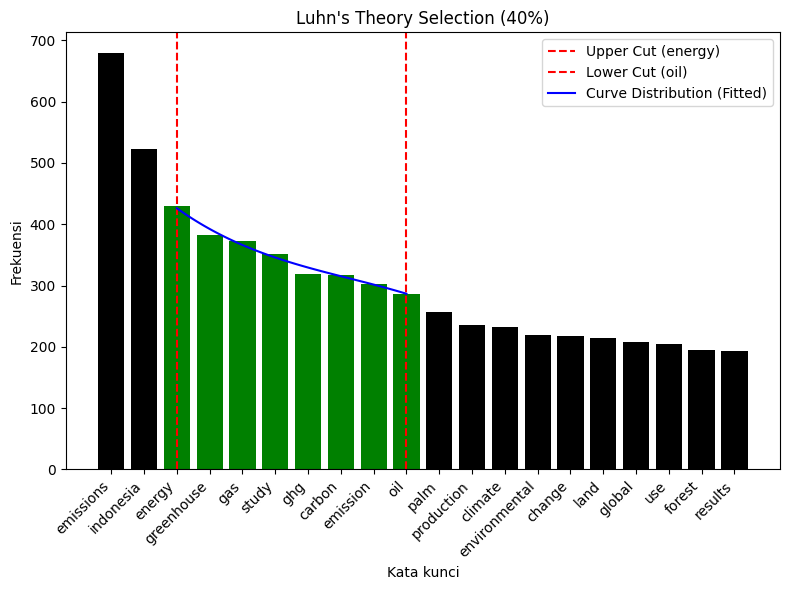

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

word_frequencies = {
    'emissions': 679, 'indonesia': 522, 'energy': 429, 'greenhouse': 383,
    'gas': 373, 'study': 352, 'ghg': 319, 'carbon': 318, 'emission': 303,
    'oil': 286, 'palm': 257, 'production': 236, 'climate': 233, 'environmental': 219,
    'change': 217, 'land': 214, 'global': 208, 'use': 204, 'forest': 195, 'results': 194
}

sorted_word_frequencies = dict(sorted(word_frequencies.items(), key=lambda item: item[1], reverse=True))

words = list(sorted_word_frequencies.keys())
frequencies = list(sorted_word_frequencies.values())

energy_index = words.index('energy')
oil_index = words.index('oil')

x_vals = np.array(range(energy_index, oil_index + 1))
y_vals = np.array(frequencies[energy_index:oil_index + 1])

def polynomial(x, a, b, c, d):
    return a * x**3 + b * x**2 + c * x + d

popt, _ = curve_fit(polynomial, x_vals, y_vals)
y_fit = polynomial(x_vals, *popt)
fig, ax = plt.subplots(figsize=(8, 6))

colors = ['black'] * len(words)
for i in range(energy_index, oil_index + 1):
    colors[i] = 'green'
ax.bar(words, frequencies, color=colors)

ax.set_xlabel('Kata kunci')
ax.set_ylabel('Frekuensi')
ax.set_title('Luhn\'s Theory Selection (40%)')
ax.axvline(x='energy', color='red', linestyle='--', label='Upper Cut (energy)')
ax.axvline(x='oil', color='red', linestyle='--', label='Lower Cut (oil)')
x_interp = np.linspace(energy_index, oil_index, 100)
y_interp = polynomial(x_interp, *popt)
ax.plot(x_interp, y_interp, color='blue', label='Curve Distribution (Fitted)')
plt.xticks(rotation=45, ha='right')
ax.legend()
plt.tight_layout()
plt.show()


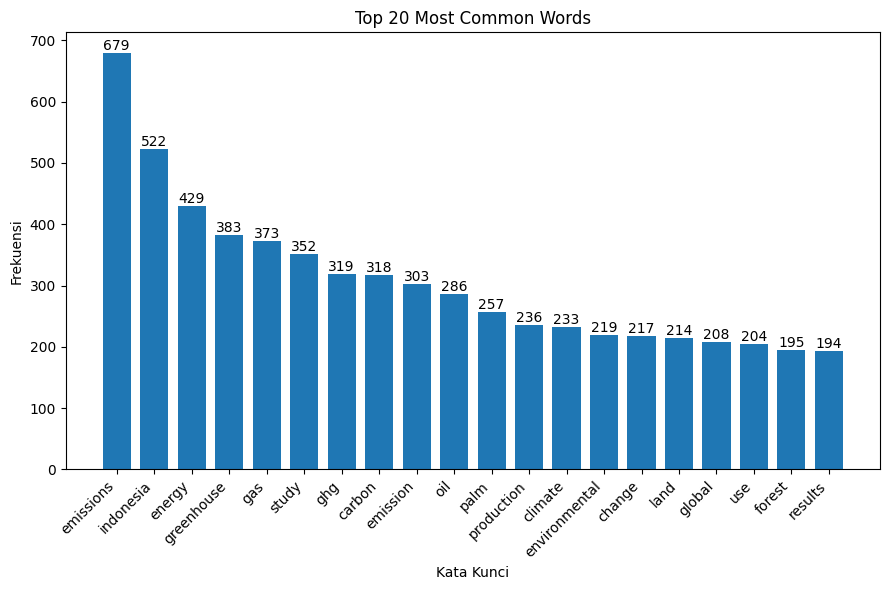

In [9]:
import matplotlib.pyplot as plt

data = {k: v for k, v in sorted(top20_dict.items(), key=lambda item: item[1], reverse=True)}

labels = list(data.keys())
values = list(data.values())

# Adjust the figure size and spacing between bars
plt.figure(figsize=(9, 6))
plt.bar(labels, values, width=0.75, align='center')

# Add text labels on top of the bars
for i, v in enumerate(values):
    plt.text(i, v, str(v), ha='center', va='bottom', fontsize=10)

plt.ylabel('Frekuensi')
plt.xlabel('Kata Kunci')
plt.xticks(rotation=45, ha='right')
plt.title('Top 20 Most Common Words')

plt.tight_layout()  # To avoid overlapping labels
plt.show()


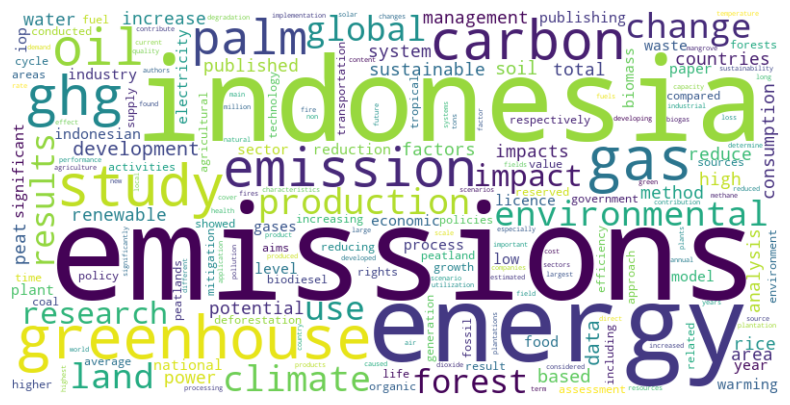

In [10]:
# Create a WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(sorted_result)
# Display the generated word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


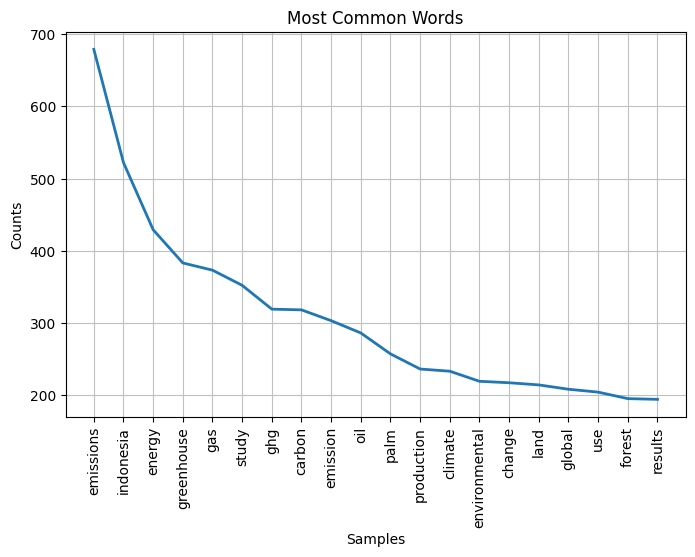

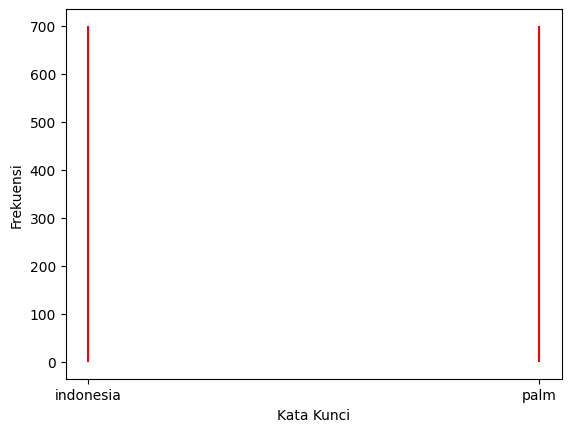

In [11]:
import nltk
nltk.download('punkt')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
import matplotlib.pyplot as plt

# Sample text data
text_data = """
Qualitative analysis is a method for examining non-numeric data 
to understand and interpret patterns and themes. It involves the 
study of texts, interviews, observations, and other qualitative 
sources to gain insights into human experiences and behaviors. 
Thematic analysis is a popular approach in qualitative research, 
where researchers identify and analyze themes or patterns within 
the data. The process involves reading and rereading the text, 
coding segments into themes, and interpreting the findings to 
develop meaningful insights.
"""

# Tokenize the text and remove stopwords
tokens = word_tokenize(text_data)
stop_words = set(stopwords.words('english'))
filtered_tokens = [word for word in tokens if word.lower() not in stop_words and word.isalpha()]

# Calculate word frequency distribution
fdist = FreqDist(keywords_array)

# Plot the most common words
plt.figure(figsize=(8, 5))
fdist.plot(20, title='Most Common Words')
plt.ylabel('Frekuensi')
plt.xlabel('Kata Kunci')
plt.vlines(x = ['indonesia', 'palm'], ymin=0, ymax=700, color = 'r', label = 'upper and lower cut')
plt.show()


In [12]:
import gensim
#Create Bigram & Trigram Models 
from gensim.models import Phrases
text_list = ['energy', 'greenhouse','gas','study', 'ghg', 'carbon', 'emission', 'oil']

# Add bigrams and trigrams to docs,minimum count 10 means only that appear 10 times or more.
bigram = Phrases(text_list, min_count=10)
trigram = Phrases(bigram[text_list])
for idx in range(len(text_list)):
    for token in bigram[text_list[idx]]:
        if '_' in token:
            # Token is a bigram, add to document.
            text_list[idx].append(token)
    for token in trigram[text_list[idx]]:
        if '_' in token:
            # Token is a bigram, add to document.
            text_list[idx].append(token)

print(np.array(text_list).ndim)

1


In [13]:
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.datasets import fetch_20newsgroups

# Load the 20 Newsgroups dataset for example text data
newsgroups = fetch_20newsgroups(subset='all', remove=('headers', 'footers', 'quotes'))

# Step 1: Create a TF-IDF vectorizer to convert text data into numerical features
vectorizer = TfidfVectorizer(max_features=1000)  # You can adjust the max_features parameter
X = vectorizer.fit_transform(newsgroups.data)

# Step 2: Apply K-means clustering
num_clusters = 20  # You can adjust the number of clusters
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(X)

# Step 3: Get the cluster centers and the top words for each cluster
order_centroids = kmeans.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names_out()

print("Top words per cluster:")
for i in range(num_clusters):
    print(f"Cluster {i}:")
    for ind in order_centroids[i, :10]:  # Display top 10 words per cluster
        print(f"  {terms[ind]}")
    print()

# Step 4: Assign documents to their corresponding clusters
print("Sample documents and their clusters:")
for i in range(len(newsgroups.data[:10])):  # Display the first 10 documents
    cluster = kmeans.predict(X[i])[0]
    print(f"Document {i} - Cluster {cluster}: {newsgroups.data[i][:100]} ...")
    print()


c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Top words per cluster:
Cluster 0:
  edu
  the
  to
  of
  and
  university
  it
  cs
  is
  in

Cluster 1:
  the
  in
  of
  and
  is
  to
  for
  you
  that
  this

Cluster 2:
  game
  the
  to
  in
  and
  games
  of
  that
  was
  on

Cluster 3:
  you
  the
  to
  your
  of
  and
  that
  it
  is
  if

Cluster 4:
  the
  to
  of
  that
  is
  and
  in
  it
  you
  not

Cluster 5:
  sale
  for
  offer
  condition
  and
  shipping
  the
  asking
  new
  or

Cluster 6:
  anyone
  does
  the
  know
  thanks
  of
  to
  any
  for
  have

Cluster 7:
  thanks
  please
  me
  for
  the
  to
  any
  mail
  am
  in

Cluster 8:
  it
  the
  is
  to
  that
  and
  of
  in
  not
  for

Cluster 9:
  to
  the
  and
  of
  is
  for
  in
  that
  have
  my

Cluster 10:
  the
  of
  to
  and
  in
  that
  is
  was
  by
  it

Cluster 11:
  10
  11
  12
  13
  15
  14
  17
  18
  16
  period

Cluster 12:
  the
  was
  that
  to
  of
  it
  and
  in
  had
  my

Cluster 13:
  00
  for
  50
  the
  20
  s

In [14]:
terms = vectorizer.get_feature_names_out()

print("Top words per cluster:")
for i in range(num_clusters):
    print(f"Cluster {i}:")
    for ind in order_centroids[i, :10]:  # Display top 10 words per cluster
        print(f"  {terms[ind]}")
    print()

# Step 4: Assign documents to their corresponding clusters
print("Sample documents and their clusters:")
for i in range(len(newsgroups.data[:10])):  # Display the first 10 documents
    cluster = kmeans.predict(X[i])[0]
    print(f"Document {i} - Cluster {cluster}: {newsgroups.data[i][:100]} ...")
    print()

Top words per cluster:
Cluster 0:
  edu
  the
  to
  of
  and
  university
  it
  cs
  is
  in

Cluster 1:
  the
  in
  of
  and
  is
  to
  for
  you
  that
  this

Cluster 2:
  game
  the
  to
  in
  and
  games
  of
  that
  was
  on

Cluster 3:
  you
  the
  to
  your
  of
  and
  that
  it
  is
  if

Cluster 4:
  the
  to
  of
  that
  is
  and
  in
  it
  you
  not

Cluster 5:
  sale
  for
  offer
  condition
  and
  shipping
  the
  asking
  new
  or

Cluster 6:
  anyone
  does
  the
  know
  thanks
  of
  to
  any
  for
  have

Cluster 7:
  thanks
  please
  me
  for
  the
  to
  any
  mail
  am
  in

Cluster 8:
  it
  the
  is
  to
  that
  and
  of
  in
  not
  for

Cluster 9:
  to
  the
  and
  of
  is
  for
  in
  that
  have
  my

Cluster 10:
  the
  of
  to
  and
  in
  that
  is
  was
  by
  it

Cluster 11:
  10
  11
  12
  13
  15
  14
  17
  18
  16
  period

Cluster 12:
  the
  was
  that
  to
  of
  it
  and
  in
  had
  my

Cluster 13:
  00
  for
  50
  the
  20
  s

c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


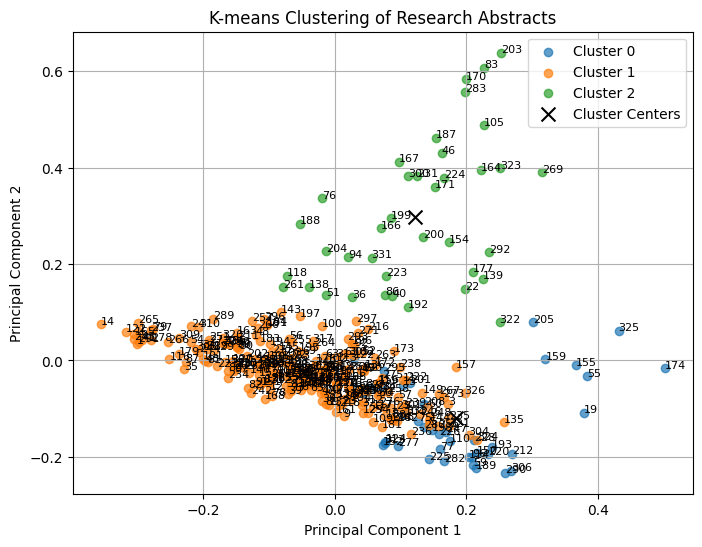

In [26]:
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Step 1: Create a TF-IDF vectorizer to convert abstracts into numerical features
vectorizer = TfidfVectorizer(max_features=1300)  # You can adjust the max_features parameter
X = vectorizer.fit_transform(df['Abstract'])

# Step 2: Apply K-means clustering
num_clusters = 3  # You can adjust the number of clusters
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(X)

# Step 3: Reduce dimensionality using PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X.toarray())

# Step 4: Get cluster labels and cluster centers
cluster_labels = kmeans.labels_
cluster_centers = pca.transform(kmeans.cluster_centers_)

# Step 5: Plot the abstracts with different colors for each cluster
plt.figure(figsize=(8, 6))
for i in range(num_clusters):
    cluster_data = X_pca[cluster_labels == i]
    plt.scatter(cluster_data[:, 0], cluster_data[:, 1], label=f'Cluster {i}', alpha=0.7)

# Plot cluster centers with 'x' markers
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], marker='x', s=100, c='black', label='Cluster Centers')

# Add labels to data points for better interpretation
for i, abstract in enumerate(df['Abstract']):
    plt.text(X_pca[i, 0], X_pca[i, 1], f"{i+1}", fontsize=8)

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('K-means Clustering of Research Abstracts')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
df = pd.read_csv('Data/Update/Scopus.csv')
df['Abstract']

0      The covid-19 pandemic has altered the course o...
1      Indonesian Government has strongly announcemen...
2      Carbon storage in tropical peat ecosystems ove...
3      Residential sector is one of the energy-consum...
4      Anthropogenic interventions in natural forests...
                             ...                        
328    The need for energy especially biomass-based r...
329    This paper examines the impact of promoting cl...
330    The oil and gas industry has often been blamed...
331    The increase of greenhouse gasses effect is on...
332    Understanding the dynamics of carbon mineraliz...
Name: Abstract, Length: 333, dtype: object

In [27]:
(X[0].toarray()).shape

(1, 1300)

In [23]:
X[0].toarray()

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.1267043 ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.10385002, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.  

In [24]:
df = pd.read_csv('Data/Update/Scopus.csv')
# Step 0: Preprocess data
def preprocess_text(text):
    # Mengubah teks menjadi huruf kecil
    text = text.lower()
    # Menghilangkan tanda baca dan karakter khusus
    text = re.sub(r'[^\w\s]', '', text)

    # Tokenisasi menggunakan spaCy
    doc = nlp(text)
    
    # Menghapus kata-kata yang merupakan verb (kata kerja) atau adjective (kata sifat)
    words = [token.text for token in doc if token.pos_ not in ['VERB', 'ADJ', 'GPE']]
    return ' '.join(words)

# Melakukan preprocessing pada kolom 'abstrak'
df['Abstract'] = df['Abstract'].apply(preprocess_text)
df['Abstract']

NameError: name 're' is not defined

# Base Preprocessing

In [46]:
import re
df = pd.read_csv('Data/Update/Scopus.csv')
# Step 0: Preprocessing data
nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])  # Disable the parser and named entity recognition
def preprocess_text(text):
    # Mengubah teks menjadi huruf kecil
    text = text.lower()
    # Menghilangkan tanda baca dan karakter khusus
    text = re.sub(r'[^\w\s]', '', text)
    # Tokenisasi menggunakan spaCy
    doc = nlp(text)
    words = [token.text for token in doc if token.pos_ not in ['VERB', 'ADJ', "GPE"] and not token.is_digit and not token.is_currency and not token.is_space and not token.text.isnumeric() and len(token)>2]
    return ' '.join(words)

def preprocess_text2(text):
    # Mengubah teks menjadi huruf kecil
    text = text.lower()
    # Menghilangkan tanda baca dan karakter khusus
    text = re.sub(r'[^\w\s]', '', text)

    # Tokenisasi menggunakan spaCy
    doc = nlp(text)
    
    # Menghapus kata-kata yang merupakan verb (kata kerja) atau adjective (kata sifat)
    words = [token.text for token in doc if not token.is_stop and token.pos_ not in ['VERB', 'ADJ', "GPE"] and not token.is_digit and not token.is_currency and not token.is_space and not token.text.isnumeric() and len(token)>2]
    return ' '.join(words)

# Melakukan preprocessing pada kolom 'abstrak'
df['Abstrak'] = df['Abstract'].apply(preprocess_text2)
df['Abstract'] = df['Abstract'].apply(preprocess_text)

0      the covid19 pandemic has the course the econom...
1      government has strongly announcement the publi...
2      carbon storage peat ecosystems over thousands ...
3      sector one the energyconsuming districts count...
4      interventions forests have deforestation and f...
                             ...                        
328    the need for energy especially energy indonesi...
329    this paper the impact energy production throug...
330    the oil and gas industry has often been for it...
331    the increase greenhouse gasses effect one the ...
332    the dynamics carbon mineralization peats the a...
Name: Abstract, Length: 333, dtype: object

In [47]:
from collections import Counter

keywords_array = []

# Similiar with Unigram
for _, row in df.iterrows():
    sentence = row['Abstrak']
    keywords = extract_keywords(sentence)
    keywords_array.extend(keywords)

keywords_list = pd.DataFrame(list(set(keywords_array)))

abstract_count = Counter(keywords_array)

result_dict = {key: abstract_count[key] for key in keywords_array if key in abstract_count}
sorted_result = dict(sorted(result_dict.items(), key=lambda item: (item[1], item[0])))

len(keywords_list)

4580

# TFIDF -> KMEANS

c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.

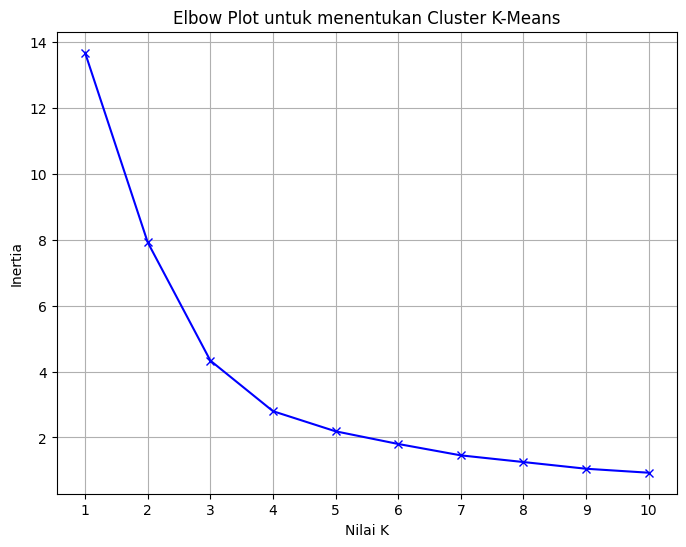

In [48]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Step 1: Create a TF-IDF vectorizer to convert text data into numerical features
vectorizer = TfidfVectorizer(max_features=len(keywords_list))  # You can adjust the max_features parameter
X = vectorizer.fit_transform(df['Abstrak'])

# Step 2: Reduce dimensionality using PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X.toarray())

# plt.figure(figsize=(8, 6))
# plt.scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.7)
# plt.xlabel('Principal Component 1')
# plt.ylabel('Principal Component 2')
# plt.title('PCA Visualization')
# plt.grid(True)
# plt.show()

# Step 3: Perform K-Means clustering with varying number of clusters
num_clusters_range = range(1, 11)  # Trying 1 to 10 clusters
inertia_values = []  # To store the inertia (within-cluster sum of squares) for each number of clusters

for num_clusters in num_clusters_range:
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    kmeans.fit(X_pca)
    inertia_values.append(kmeans.inertia_)

# Step 4: Plot the elbow plot to find the optimal number of clusters
plt.figure(figsize=(8, 6))
plt.plot(num_clusters_range, inertia_values, marker='x', linestyle='-', color='b')
plt.xlabel('Nilai K')
plt.ylabel('Inertia')
plt.title('Elbow Plot untuk menentukan Cluster K-Means')
plt.xticks(num_clusters_range)
plt.grid(True)
plt.show()


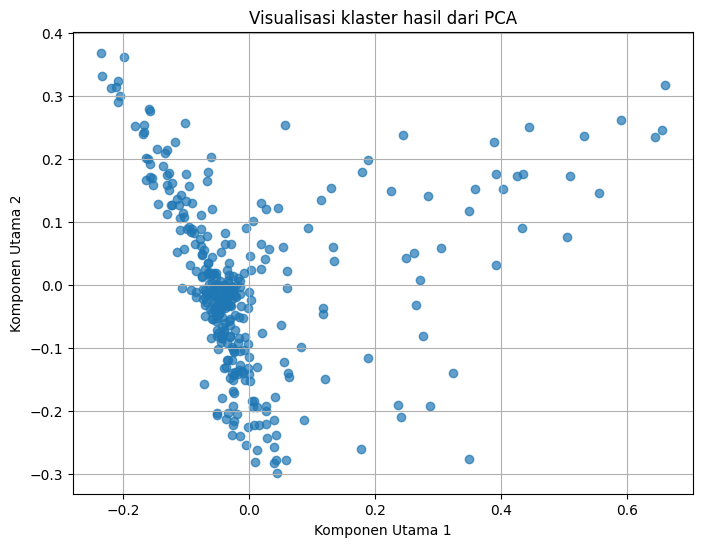

In [49]:
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.7)
plt.xlabel('Komponen Utama 1')
plt.ylabel('Komponen Utama 2')
plt.title('Visualisasi klaster hasil dari PCA')
plt.grid(True)
plt.show()

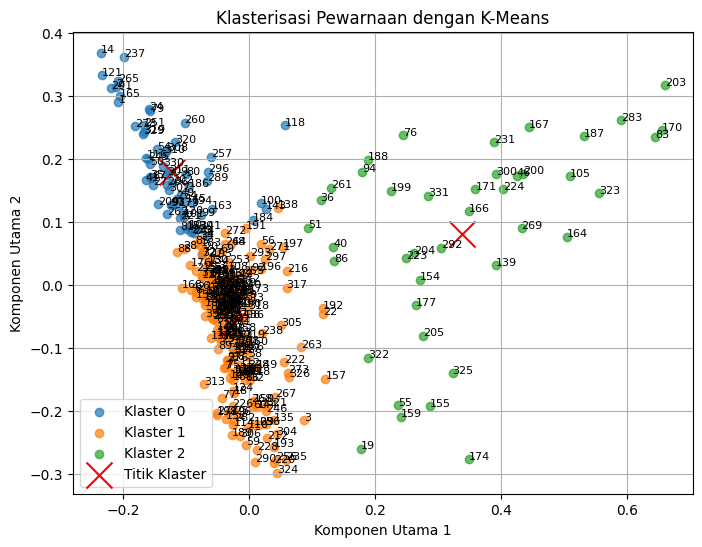

In [50]:
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Step 1: Create a TF-IDF vectorizer to convert abstracts into numerical features
vectorizer = TfidfVectorizer(max_features=len(keywords_list))  # You can adjust the max_features parameter
X = vectorizer.fit_transform(df['Abstrak'])

# Step 2: Apply K-means clustering
num_clusters = 3  # You can adjust the number of clusters
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(X)

# Step 3: Reduce dimensionality using PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X.toarray())

# Step 4: Get cluster labels and cluster centers
cluster_labels = kmeans.labels_
cluster_centers = pca.transform(kmeans.cluster_centers_)

# Step 5: Plot the abstracts with different colors for each cluster
plt.figure(figsize=(8, 6))
for i in range(num_clusters):
    cluster_data = X_pca[cluster_labels == i]
    plt.scatter(cluster_data[:, 0], cluster_data[:, 1], label=f'Klaster {i}', alpha=0.7)

# Plot cluster centers with 'x' markers
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], marker='x', s=350, c='red', label='Titik Klaster')

# Add labels to data points for better interpretation
for i, abstract in enumerate(df['Abstrak']):
    plt.text(X_pca[i, 0], X_pca[i, 1], f"{i+1}", fontsize=8)

plt.xlabel('Komponen Utama 1')
plt.ylabel('Komponen Utama 2')
plt.title('Klasterisasi Pewarnaan dengan K-Means')
plt.legend()
plt.grid(True)
plt.show()

In [60]:
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.pyplot as plt

# Step 1: Create a TF-IDF vectorizer to convert abstracts into numerical features
vectorizer = TfidfVectorizer(max_features=len(keywords_list))  # You can adjust the max_features parameter
X = vectorizer.fit_transform(df['Abstrak'])

# Step 2: Apply K-means clustering
num_clusters = 3  # You can adjust the number of clusters
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(X)

# Step 3: Reduce dimensionality using PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X.toarray())

# Step 4: Get cluster labels and cluster centers
cluster_labels = kmeans.labels_
cluster_centers = pca.transform(kmeans.cluster_centers_)

# Step 5: Compute Silhouette Score and Silhouette Coefficients
silhouette_avg = silhouette_score(X.toarray(), cluster_labels)
silhouette_values = silhouette_samples(X.toarray(), cluster_labels)

# Step 6: Plot the abstracts with different colors for each cluster
plt.figure(figsize=(10, 6))
y_lower = 10

for i in range(num_clusters):
    # Extract Silhouette Coefficients for cluster i
    ith_cluster_silhouette_values = silhouette_values[cluster_labels == i]

    # Sort Silhouette Coefficients for cluster i
    ith_cluster_silhouette_values.sort()

    # Calculate the size of cluster i
    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    # Color for cluster i
    color = plt.cm.Spectral(float(i) / num_clusters)

    # Plot Silhouette Coefficients for cluster i
    plt.fill_betweenx(np.arange(y_lower, y_upper), ith_cluster_silhouette_values, facecolor=color, edgecolor=color, alpha=0.7)

    # Label on the plot to show the average Silhouette Score for cluster i
    plt.text(-0.05, y_lower + 0.5 * size_cluster_i, f"Klaster {i}: {round(np.mean(ith_cluster_silhouette_values), 2)}")

    # Calculate y_lower for the next cluster
    y_lower = y_upper + 10

# Vertical line to indicate the average Silhouette Score
plt.axvline(x=silhouette_avg, color="red", linestyle="--", label="Rata-rata Silhouette Score")

plt.xlabel("Silhouette Coefficient")
plt.ylabel("Cluster")
plt.title("Silhouette Plot untuk K-Means Clustering (Silhouette Score = " + str(round(silhouette_avg, 2)) + ")")
plt.legend()
plt.yticks([])
plt.show()


KeyError: 'Abstrak'

In [ ]:
num_clusters = 3
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
cluster_labels = kmeans.fit_predict(X_pca)

# Step 4: Create a dictionary to store texts for each cluster
cluster_texts = {}
for i, abstract_text in enumerate(df['Abstrak']):
    cluster_label = cluster_labels[i]
    if cluster_label not in cluster_texts:
        cluster_texts[cluster_label] = []
    cluster_texts[cluster_label].append(abstract_text)

# Step 5: Print texts for each cluster
for cluster_label, texts in cluster_texts.items():
    print(f"Cluster {cluster_label}:")
    for text in texts:
        print(text)
    print()  # Add an empty line between clusters

Cluster 2:
covid19 pandemic course economy world indonesia government policy restriction home household consumption energy use energy growth greatly wave strikes longterm economy electricity consumption plan coal energy generation sector pathway energy nre environmentally electricity reduction greenhouse gas ghg emissions electricity demandsupply analysis leap result utilization nre ghg emission million tons co2 equivalent energy mix goal development grid energy storage intermittency wind electricity factors power generation cost land requirement externalities grid stability carefully order electricity burden form government subsidies american institute physics inc rights
government strongly announcement public line paris agreement countries globe commitment greenhouse gas effect demand market twh twh demand status energy supply twh energy times energy energy resources energy supplies fuels producer nre gradually energy demand co2 emission zero target study contribution energy resource

c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [ ]:
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

data = df['Abstrak']
# Step 1: Create a TF-IDF vectorizer to convert abstracts into numerical features
vectorizer = TfidfVectorizer(max_features=1000)  # You can adjust the max_features parameter
X = vectorizer.fit_transform(df['Abstrak'])

# Step 2: Apply K-means clustering
num_clusters = 3  # You can adjust the number of clusters
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(X)

# Step 3: Reduce dimensionality using PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X.toarray())

# Step 4: Get cluster labels and cluster centers
cluster_labels = kmeans.labels_
cluster_centers = pca.transform(kmeans.cluster_centers_)

keywords_per_cluster = {}
for i in range(num_clusters):
    cluster_data = [data[j] for j in range(len(data)) if cluster_labels[j] == i]
    cluster_text = ' '.join(cluster_data)

    # Create a new TF-IDF vectorizer for the cluster and fit_transform it
    cluster_vectorizer = TfidfVectorizer()
    cluster_X = cluster_vectorizer.fit_transform([cluster_text])

    # Get the feature names and corresponding TF-IDF scores
    feature_names = cluster_vectorizer.get_feature_names_out()
    tfidf_scores = cluster_X.toarray()[0]

    # Sort the features based on their TF-IDF scores
    sorted_indices = np.argsort(tfidf_scores)[::-1]

    # Get the top N keywords from the cluster
    N = 20
    keywords = [feature_names[idx] for idx in sorted_indices[:N]]
    keywords_per_cluster[i] = keywords

# Print the keywords for each cluster
for i in range(num_clusters):
    print(f"Cluster {i} Keywords: {', '.join(keywords_per_cluster[i])}")

Cluster 0 Keywords: emissions, indonesia, greenhouse, study, carbon, ghg, emission, gas, climate, change, forest, co2, land, results, research, rice, production, data, soil, development
Cluster 1 Keywords: energy, power, emissions, indonesia, gas, electricity, co2, greenhouse, production, consumption, emission, study, generation, plant, coal, system, development, use, ghg, efficiency
Cluster 2 Keywords: oil, palm, emissions, indonesia, production, gas, greenhouse, biodiesel, industry, ghg, study, soil, land, forest, peat, plantations, n2o, carbon, co2, impact


# Luhn

In [ ]:
def extract_keywords(sentence):
    doc = nlp(sentence)
    keywords = [str(token.text.lower()) for token in doc if token.lemma_]
    return keywords

keywords_array = []

# Similiar with Unigram
for _, row in df.iterrows():
    sentence = row['Abstract']
    keywords = extract_keywords(sentence)
    keywords_array.extend(keywords)

keywords_list = pd.DataFrame(list(set(keywords_array)))

display(keywords_list)

,0
0,effort
1,access
2,densification
3,nue
4,beans
...,...
4749,thailands
4750,risks
4751,ncv
4752,fear


In [ ]:
from collections import Counter
abstract_count = Counter(keywords_array)

result_dict = {key: abstract_count[key] for key in keywords_array if key in abstract_count}
sorted_result = dict(sorted(result_dict.items(), key=lambda item: (item[1], item[0])))

print(sorted_result)

{'02span': 1, '107us': 1, '1266span': 1, '13luasb': 1, '14660thinsp': 1, '15l': 1, '16c': 1, '16s': 1, '175c': 1, '1800s': 1, '1990s': 1, '200c': 1, '2013all': 1, '2019the': 1, '209734z17z': 1, '21st': 1, '21usdton': 1, '2247μgg': 1, '225c': 1, '24hour': 1, '2526c': 1, '285ton': 1, '28h': 1, '30yearold': 1, '32246thinsp': 1, '3300kwh': 1, '3year': 1, '40948mw': 1, '40c': 1, '419c': 1, '41year': 1, '492μgg': 1, '4th': 1, '500yr': 1, '50fold': 1, '50thinsp': 1, '518790tonne': 1, '520mw': 1, '5coordinated': 1, '5yearold': 1, '639span': 1, '7574thinsp': 1, '793c': 1, '8661thinsp': 1, '8kw': 1, 'aaiw': 1, 'aalborg': 1, 'aard': 1, 'abandonment': 1, 'abr': 1, 'academic': 1, 'acceptability': 1, 'accessibility': 1, 'accord': 1, 'accordingly': 1, 'accountability': 1, 'achievement': 1, 'achievements': 1, 'acidity': 1, 'act': 1, 'actually': 1, 'adaptability': 1, 'adaptations': 1, 'additives': 1, 'adequacy': 1, 'adjustments': 1, 'administrator': 1, 'adoptions': 1, 'adults': 1, 'advancement': 1, 'ad

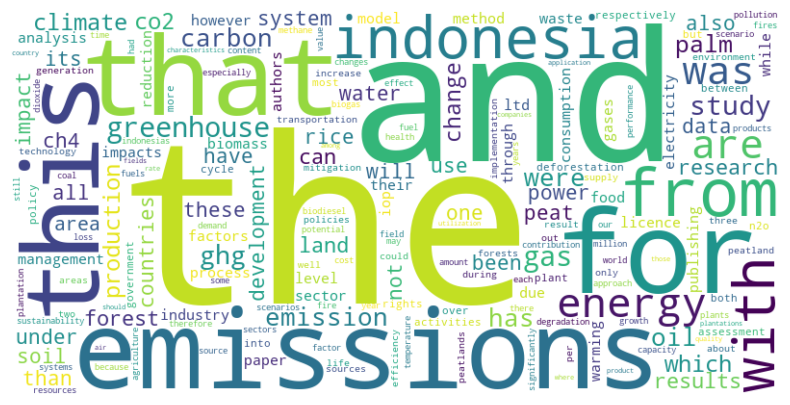

In [ ]:
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(sorted_result)
# Display the generated word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
top20 = dict(abstract_count.most_common(20))
top20_dict = dict(sorted(top20.items(), key=lambda item: (item[1], item[0])))
print(top20_dict)

{'oil': 283, 'has': 291, 'emission': 300, 'carbon': 302, 'ghg': 314, 'study': 339, 'gas': 371, 'greenhouse': 382, 'was': 395, 'are': 407, 'energy': 417, 'with': 451, 'indonesia': 460, 'from': 608, 'this': 629, 'that': 677, 'emissions': 678, 'for': 750, 'and': 2808, 'the': 5030}


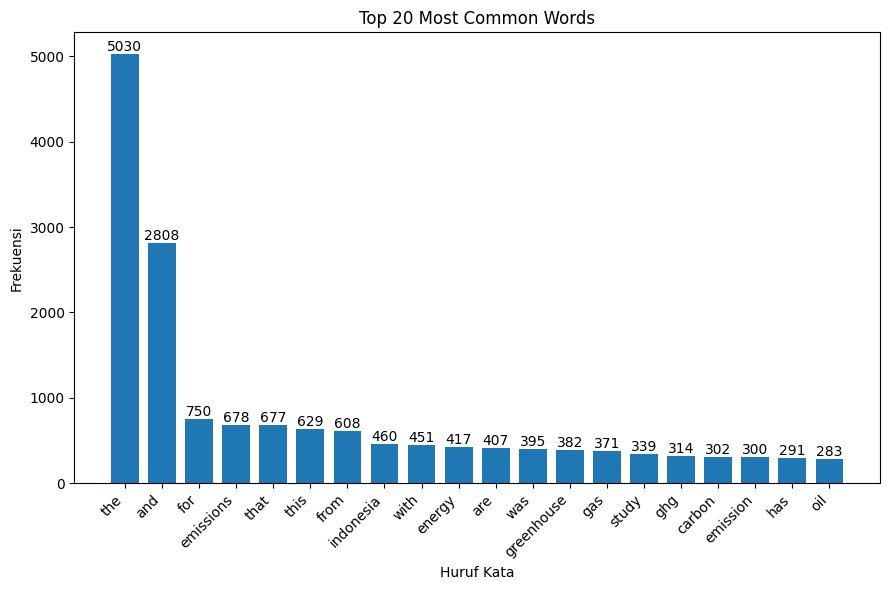

In [ ]:
import matplotlib.pyplot as plt

data = {k: v for k, v in sorted(top20_dict.items(), key=lambda item: item[1], reverse=True)}

labels = list(data.keys())
values = list(data.values())

# Adjust the figure size and spacing between bars
plt.figure(figsize=(9, 6))
plt.bar(labels, values, width=0.75, align='center')

# Add text labels on top of the bars
for i, v in enumerate(values):
    plt.text(i, v, str(v), ha='center', va='bottom', fontsize=10)

plt.ylabel('Frekuensi')
plt.xlabel('Huruf Kata')
plt.xticks(rotation=45, ha='right')
plt.title('Top 20 Most Common Words')

plt.tight_layout()  # To avoid overlapping labels
plt.show()


In [ ]:
df = pd.DataFrame(list(sorted_result.items()), columns=['Word', 'Counts'])
# Save DataFrame to a CSV file
csv_file_path = 'data_luhn.csv'
df.to_csv(csv_file_path, index=False)